<a href="https://colab.research.google.com/github/woodstone10/data_collection/blob/main/Scraping_and_Analysis_of_customer_review_from_NAVER_shopping_for_LG%EC%A0%84%EC%9E%90_%EC%98%A4%EB%B8%8C%EC%A0%9C%EC%BB%AC%EB%A0%89%EC%85%98_AO9571.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping and Analysis of customer review from NAVER shopping for LG전자 오브제컬렉션 AO9571

---
Two methods,
- **BeautifulShop**: easy code, but difficult to move next page
- **Selenium**: more complicate, but possible to move next page, just read whole data


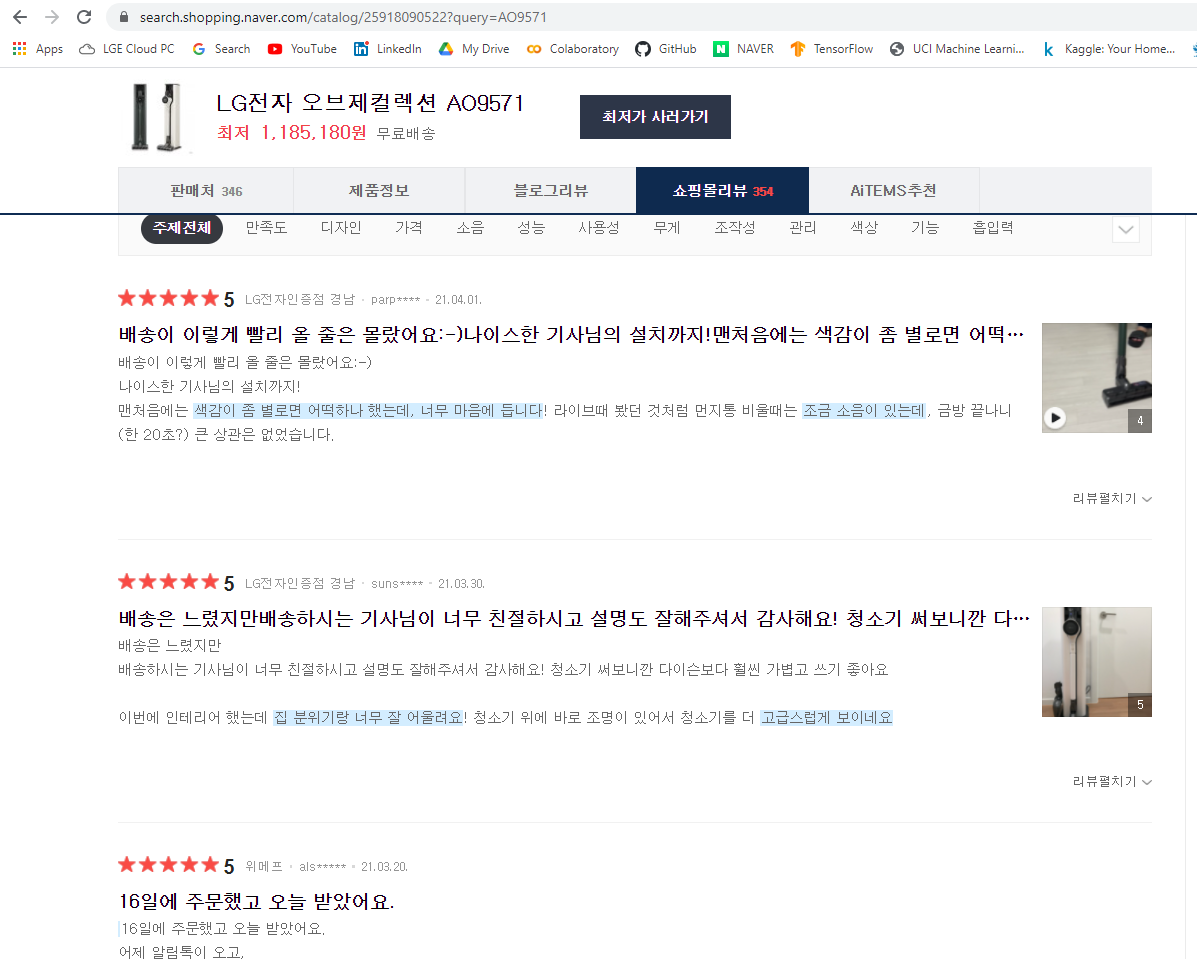

In [3]:
url = "https://search.shopping.naver.com/catalog/25918090522?query=AO9571"

## **BeautifulShop**

---
Unfortunately, the same URL for all pages. So it is difficult to mage moving


In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

def get_NAVER_shopping_customer_review_bs(url):
  df = pd.DataFrame(columns=('title','score','market','date','review'))
  page = urllib.request.urlopen(url).read()
  bs = BeautifulSoup(page, 'html.parser')
  info_list = bs.find_all("div", {"class": "reviewItems_etc_area__2P8i3"})
  content_list = bs.find_all("div", {"class": "reviewItems_review__1eF8A"})

  idx = 0
  for i, j in zip(info_list, content_list):
    score = i.find("span", {"class": "reviewItems_average__16Ya-"}).get_text().replace('평점', '')
    market = i.findAll("span", {"class": "reviewItems_etc__1YqVF"})[0].get_text()
    date = i.findAll("span", {"class": "reviewItems_etc__1YqVF"})[2].get_text() 
    title = j.find("em", {"class": "reviewItems_title__39Z8H"}).get_text()       
    review = j.find("p", {"class": "reviewItems_text__XIsTc"}).get_text() 
    #print(title, "\n", score, "\n", market, "\n", date, "\n", review)
    df.loc[idx] = [title, score, market, date, review]
    idx += 1
  return df

In [20]:
df = get_NAVER_shopping_customer_review_bs(url)
df

,title,score,market,date,review
0,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...,5,LG전자인증점 경남,21.04.01.,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...
1,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...,5,LG전자인증점 경남,21.03.30.,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...
2,16일에 주문했고 오늘 받았어요.,5,위메프,21.03.20.,"16일에 주문했고 오늘 받았어요.어제 알림톡이 오고,오늘 아침 시간약속전화주시고 방..."
3,배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격,5,SSG닷컴,21.04.18.,"배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격 때문에 많은 고민을 했는데, ..."
4,역시 코드제로 올인원! 원래 코드제로는 성능 좋고 가볍,5,SSG닷컴,21.03.14.,역시 코드제로 올인원!원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 쓰레...
5,청소기 구매할때가 되서 어떤게 더 나은지 정보 알아보려고 lg 공식 홈페이지 갔다가...,5,LG전자인증점 경남,21.04.09.,청소기 구매할때가 되서 어떤게 더 나은지 정보 알아보려고 lg 공식 홈페이지 갔다가...
6,4.4일에 구매하고 한참 기다리다가 14일에 배송예정이,4,SSG닷컴,21.04.16.,4.4일에 구매하고 한참 기다리다가14일에 배송예정이라고 전날 알림이 오더라구요사정...
7,주문후 7일정도후에 배송기사님이 연락이 와서 시간 조율,5,SSG닷컴,21.03.31.,주문후 7일정도후에 배송기사님이 연락이 와서 시간 조율후 배송을 받았습니다.디자인은...
8,21일에 주문하고 24일에 받았어요,5,위메프,21.03.24.,21일에 주문하고 24일에 받았어요엘지 전문 기사님들 방문해서 설치해주셨구요.일단 ...
9,좋아요. 원래 쓰던 청소기가 점점 힘이 빠져서 안 그래,4,CJmall,21.04.09.,좋아요. 원래 쓰던 청소기가 점점 힘이 빠져서 안 그래도 새로 구매하려고 했었거든요...


## **Selenium**

In [14]:
!pip install selenium

In [15]:
!apt-get update 
!apt install chromium-chromedriver

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [16]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [4]:
import selenium
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [5]:
import urllib.request
import time
import pandas as pd

def get_NAVER_shopping_customer_review_selenium(url, page_num):
  df = pd.DataFrame(columns=('title','score','market','date','review'))
  wd = webdriver.Chrome('chromedriver', options=chrome_options)
  wd.get(url)

  idx = 0
  for page_no in range(1, page_num+1):
    try:
      page_url = '//*[@id="section_review"]/div[3]/a[' + str(page_no) + ']'       
      page = wd.find_element_by_xpath(page_url)
      page.click()
      time.sleep(1)
    except:
      break

    info_list = wd.find_elements_by_class_name('reviewItems_etc_area__2P8i3')
    content_list = wd.find_elements_by_class_name('reviewItems_review__1eF8A')

    for i, j in zip(info_list, content_list):
      score = i.find_element_by_class_name('reviewItems_average__16Ya-').text.replace('평점', '')  #i.text[2] 
      market = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[0].text #i.text[3:-9]
      date = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[2].text #i.text[-9:]
      title = j.find_element_by_class_name('reviewItems_title__39Z8H').text 
      review = j.find_element_by_class_name('reviewItems_text__XIsTc').text 
      df.loc[idx] = [title, score, market, date, review]
      idx += 1

    print("Page: {}".format(page_no, dtype=int))

  return df

In [6]:
df = get_NAVER_shopping_customer_review_selenium(url, 30)
df

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11


,title,score,market,date,review
0,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...,5,LG전자인증점 경남,21.04.01.,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...
1,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...,5,LG전자인증점 경남,21.03.30.,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...
2,16일에 주문했고 오늘 받았어요.,5,위메프,21.03.20.,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주..."
3,배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격,5,SSG닷컴,21.04.18.,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,..."
4,역시 코드제로 올인원! 원래 코드제로는 성능 좋고 가볍,5,SSG닷컴,21.03.14.,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...
...,...,...,...,...,...
215,최고예요,5,11번가,21.03.20.,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...
216,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,5,KP프라자,21.04.03.,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~
217,최고예요,5,11번가,21.04.04.,LG 물류 배송인 거 확인하고 구매했어요. LG 기사님이 예약한 배송일에 맞춰 시간...
218,최고예요,5,11번가,21.04.02.,배송은 좀 늦게 오지만 그래도 설치 하고 나니 좋아좋아 보입니다. 성능하며 물걸레 ...


In [17]:
df['score'] = df['score'].values.astype(np.int16)

In [18]:
df

,title,score,market,date,review
0,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...,5,LG전자인증점 경남,21.04.01.,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...
1,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...,5,LG전자인증점 경남,21.03.30.,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...
2,16일에 주문했고 오늘 받았어요.,5,위메프,21.03.20.,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주..."
3,배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격,5,SSG닷컴,21.04.18.,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,..."
4,역시 코드제로 올인원! 원래 코드제로는 성능 좋고 가볍,5,SSG닷컴,21.03.14.,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...
...,...,...,...,...,...
215,최고예요,5,11번가,21.03.20.,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...
216,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,5,KP프라자,21.04.03.,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~
217,최고예요,5,11번가,21.04.04.,LG 물류 배송인 거 확인하고 구매했어요. LG 기사님이 예약한 배송일에 맞춰 시간...
218,최고예요,5,11번가,21.04.02.,배송은 좀 늦게 오지만 그래도 설치 하고 나니 좋아좋아 보입니다. 성능하며 물걸레 ...


## Analysis

In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,911 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161348 files and d

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
plt.rc('font', family='NanumBarunGothic') 

### score

In [25]:
df['score'].value_counts()

5    201
4     17
2      1
3      1
Name: score, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


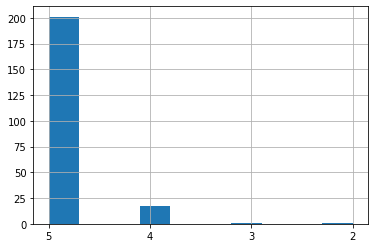

In [26]:
df['score'].hist()

### market (seller)

In [27]:
len(df['market'].unique())

18

In [28]:
df['market'].unique()

array(['LG전자인증점 경남', '위메프', 'SSG닷컴', 'CJmall', '11번가', '전자랜드', '신세계몰',
       'GSSHOP', 'KP프라자', '롯데홈쇼핑', '하이마트쇼핑몰', '인터파크', '선', '롯데백화점', '옥션',
       '홈앤쇼핑', 'G마켓', '신세계티비쇼핑'], dtype=object)

In [29]:
df['market'].value_counts()

11번가          65
GSSHOP        29
전자랜드          26
LG전자인증점 경남    18
SSG닷컴         16
신세계몰          11
위메프           11
KP프라자         10
롯데홈쇼핑          8
하이마트쇼핑몰        5
롯데백화점          4
CJmall         4
선              3
홈앤쇼핑           3
옥션             2
G마켓            2
인터파크           2
신세계티비쇼핑        1
Name: market, dtype: int64

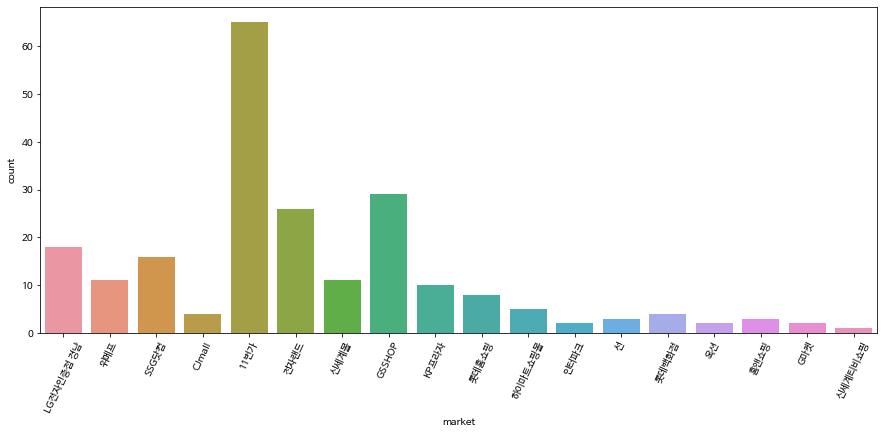

In [9]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.countplot(x='market', data=df)

### statistical analysis

---
From statistical analysis as below, "LG전자인증점"s have some problem due to low sales rate and customer review score


In [10]:
df2 = pd.DataFrame(columns=('market seller','total count','average score'))
for i in range(len(df['market'].unique())):
  seller = df['market'].unique()[i]
  tot_count = len(df[df['market']==seller].index)
  avg_score = df[df['market']==seller]['score'].values.astype(np.int16).mean()
  df2.loc[i] = [seller, tot_count, avg_score]

In [11]:
df2_count = df2.sort_values(by='total count', ascending=False)
df2_count

,market seller,total count,average score
4,11번가,65,4.907692
7,GSSHOP,29,4.862069
5,전자랜드,26,5.000000
0,LG전자인증점 경남,18,4.888889
2,SSG닷컴,16,4.812500
1,위메프,11,5.000000
6,신세계몰,11,4.909091
8,KP프라자,10,4.700000
9,롯데홈쇼핑,8,4.875000
10,하이마트쇼핑몰,5,5.000000


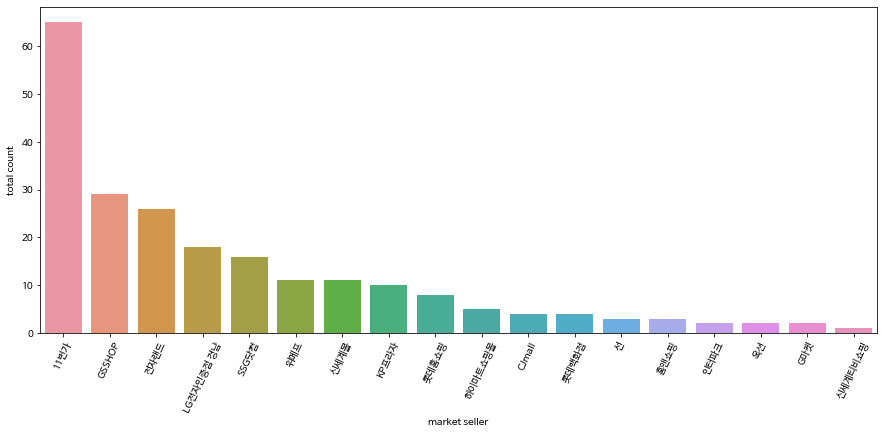

In [12]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='total count', data=df2_count)

In [13]:
df2_score = df2.sort_values(by='average score', ascending=False)
df2_score

,market seller,total count,average score
17,신세계티비쇼핑,1,5.000000
12,선,3,5.000000
16,G마켓,2,5.000000
15,홈앤쇼핑,3,5.000000
5,전자랜드,26,5.000000
14,옥션,2,5.000000
13,롯데백화점,4,5.000000
1,위메프,11,5.000000
10,하이마트쇼핑몰,5,5.000000
6,신세계몰,11,4.909091


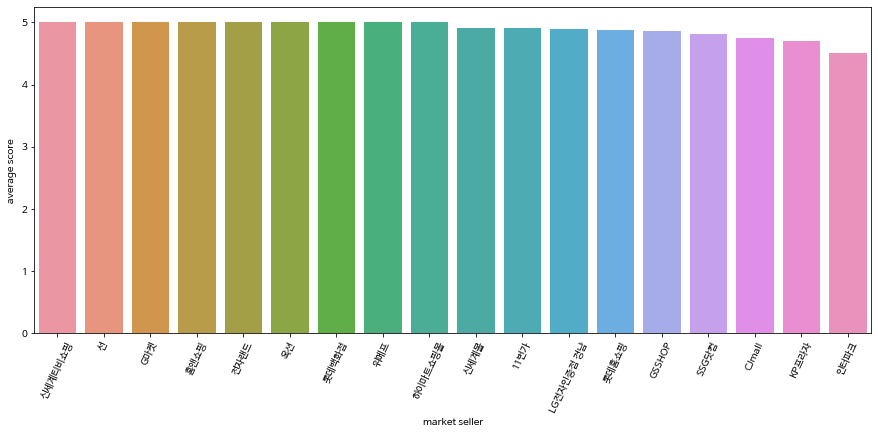

In [14]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='average score', data=df2_score)

### lowest score

In [16]:
df

,title,score,market,date,review
0,배송이 이렇게 빨리 올 줄은 몰랐어요:-)나이스한 기사님의 설치까지!맨처음에는 색감...,5,LG전자인증점 경남,21.04.01.,배송이 이렇게 빨리 올 줄은 몰랐어요:-)\n나이스한 기사님의 설치까지!\n맨처음에...
1,배송은 느렸지만배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! 청소...,5,LG전자인증점 경남,21.03.30.,배송은 느렸지만\n배송하시는 기사님이 너무 친절하시고 설명도 잘해주셔서 감사해요! ...
2,16일에 주문했고 오늘 받았어요.,5,위메프,21.03.20.,"16일에 주문했고 오늘 받았어요.\n어제 알림톡이 오고,\n오늘 아침 시간약속전화주..."
3,배송도 1주만에 왔네요. 생각외로 금방 왔어요! 가격,5,SSG닷컴,21.04.18.,"배송도 1주만에 왔네요. 생각외로 금방 왔어요!\n가격 때문에 많은 고민을 했는데,..."
4,역시 코드제로 올인원! 원래 코드제로는 성능 좋고 가볍,5,SSG닷컴,21.03.14.,역시 코드제로 올인원!\n원래 코드제로는 성능 좋고 가볍고 한데 거기다 올인원으로 ...
...,...,...,...,...,...
215,최고예요,5,11번가,21.03.20.,디자인이랑 색감에 홀딱반함?배송 적어도 5-10일 생각해야 할듯.기사님들이 설치해주...
216,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~,5,KP프라자,21.04.03.,배송이 무척 빠르구요. 판매자분께서 늦은 시간 답변도 잘 해주셔서 넘 고마웠습니다~
217,최고예요,5,11번가,21.04.04.,LG 물류 배송인 거 확인하고 구매했어요. LG 기사님이 예약한 배송일에 맞춰 시간...
218,최고예요,5,11번가,21.04.02.,배송은 좀 늦게 오지만 그래도 설치 하고 나니 좋아좋아 보입니다. 성능하며 물걸레 ...


In [21]:
df_low_score = df[df['score']<4]
df_low_score

,title,score,market,date,review
16,기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 ...,3,LG전자인증점 경남,21.04.10.,기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 ...
58,물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 ...,2,KP프라자,21.04.08.,물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 ...


In [39]:
for i in range(len(df_low_score)):
  low_review = df_low_score.loc[df_low_score.index[i]]['review']
  print("{}: {}".format(i, low_review))

0: 기존보유한 청소기 이용시간이 짧아 추가 청소기가 필요해서 큰맘먹고 샀는데 보기보다 무겁고 핸들링이 어려워요. 좌우만 잘돌아가고 침대아래쪽 같은곳은 청소기봉 길이도 짧고 액세서리툴 유용성이라던지 아직은 좀 부족한것 같아요. 다이슨이랑 같이 보완하면서 쓰고 있습니다.
1: 물에 젖어서 왔는데 이슬도 맺혀있고 기분이 나쁘네요.반품 하려다 그냥 씁니다.어떤 보상도 있어야 할 듯 합니다.
